# In this notebook
I create the k-means model that we are going to use for our land-use model.

In [5]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

# Add the unsupervised methods that we are going to try
from sklearn.cluster import KMeans

In [6]:
# Load a complete image (this is hardcoded on my desktop)
# but I basically chose an image that I know has a all expected classes in it
file_path = "/Users/zdc6/Desktop/uhi/overhead_images/"
with Image.open(os.path.join(file_path, "L15-0575E-1243N.tif")) as img:
    output = img.convert("RGB")

In [7]:
img_array = np.array(output)
img_array = img_array / 255
print(np.mean(img_array, axis=(0, 1)))
img_array = img_array - np.mean(img_array, axis=(0, 1))
print(np.std(img_array, axis=(0, 1)))
img_array = img_array / np.std(img_array, axis=(0, 1))

[0.25809011 0.2613529  0.15751467]
[0.17876056 0.13497376 0.13020081]


In [8]:
# Apply kmenas to the image
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(img_array.reshape(-1, 3))

# Get the labels and reshape to the original image size
labels = kmeans.labels_
labels = labels.reshape(img_array.shape[0], img_array.shape[1])

/Users/zdc6/mambaforge/envs/uhi/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


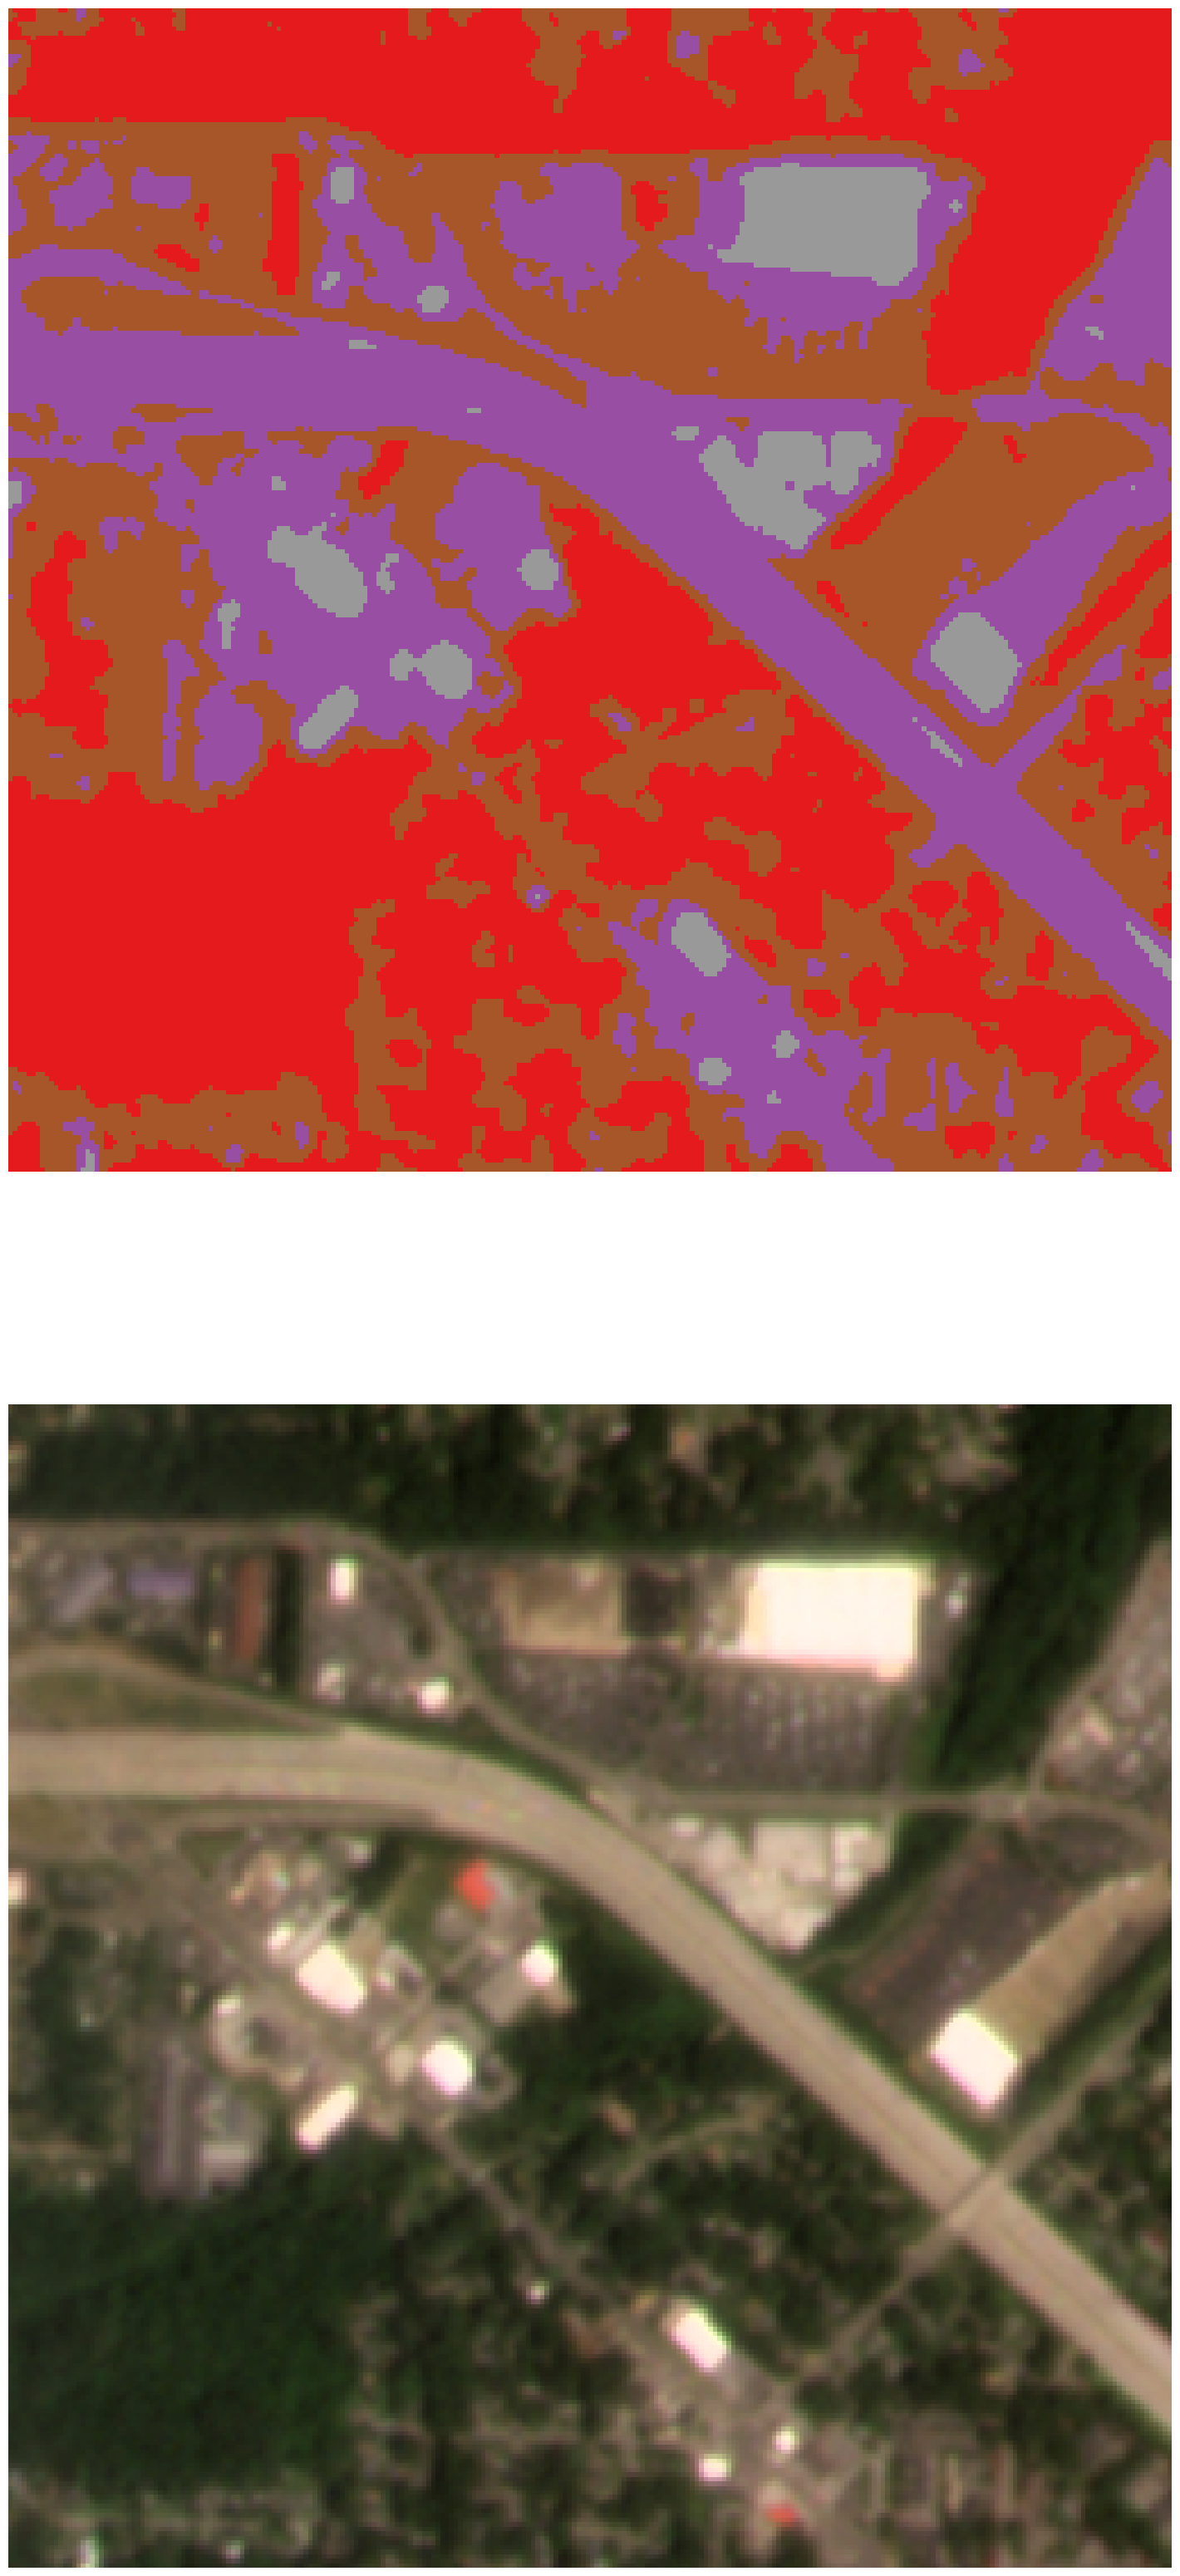

In [10]:
# Looking at 10 clusters -- this is overparameterized. I'll fix this in fix this
# in a notebook
m = 1
i = (0, 256*m)
j = (0, 256*m)
plt.figure(figsize=(40, 40))
plt.subplot(2,1,1)
plt.imshow(labels[i[0]:i[1],j[0]:j[1]], cmap="Set1")
plt.axis(False)
plt.subplot(2,1,2)
plt.imshow(np.array(output)[i[0]:i[1],j[0]:j[1]], cmap="Set1")
plt.axis(False)
plt.show()

In [11]:
import joblib

joblib.dump(kmeans, '../Models/kmeans.joblib')

['../Models/kmeans.joblib']